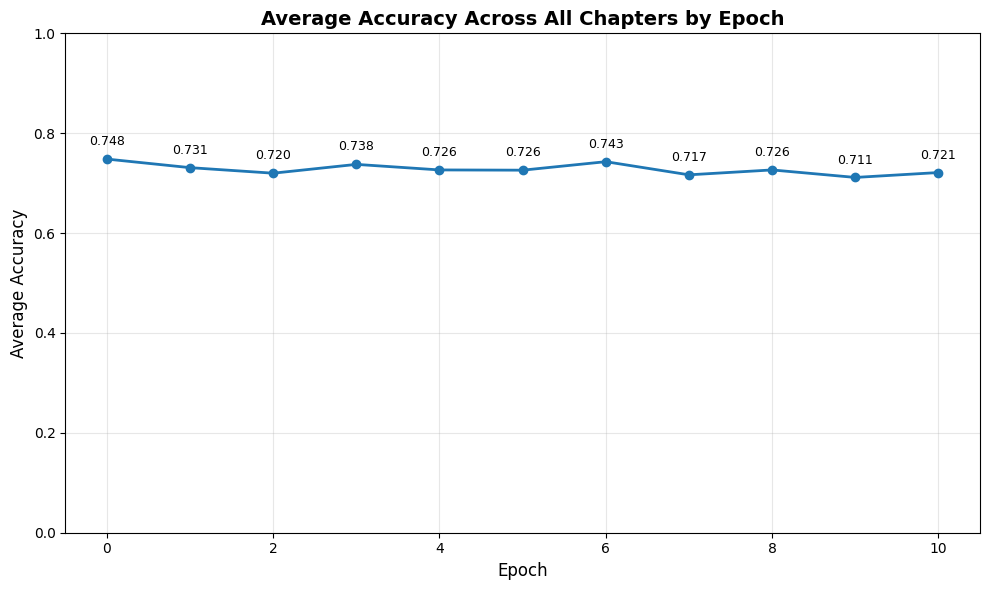

Epoch-wise Average Accuracy:
Epoch 0: 0.7482
Epoch 1: 0.7310
Epoch 2: 0.7199
Epoch 3: 0.7376
Epoch 4: 0.7265
Epoch 5: 0.7260
Epoch 6: 0.7430
Epoch 7: 0.7167
Epoch 8: 0.7265
Epoch 9: 0.7114
Epoch 10: 0.7212

Initial accuracy (Epoch 0): 0.7482
Final accuracy (Epoch 10): 0.7212
Improvement: -0.0270


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('../scripts/olmo2_tutor_eval_finetune_sft_independent_dyn_grad_accum/experiment_results_sft_independent_dyn_grad_accum.csv')

# Calculate average accuracy for each epoch
epochs = []
avg_accuracies = []

# Epoch 0: Use accuracy_before_ft_this_epoch from epoch 1
epoch_1_data = df[df['epoch'] == 1]
epoch_0_avg = epoch_1_data['accuracy_before_ft_this_epoch'].mean()
epochs.append(0)
avg_accuracies.append(epoch_0_avg)

# Epochs 1-10: Use accuracy_after_ft_this_epoch
for epoch in range(1, 11):
    epoch_data = df[df['epoch'] == epoch]
    if not epoch_data.empty:
        epoch_avg = epoch_data['accuracy_after_ft_this_epoch'].mean()
        epochs.append(epoch)
        avg_accuracies.append(epoch_avg)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, avg_accuracies, marker='o', linewidth=2, markersize=6)
plt.title('Average Accuracy Across All Chapters by Epoch', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 10.5)
plt.ylim(0, 1)

# Add value labels on each point
for i, (epoch, acc) in enumerate(zip(epochs, avg_accuracies)):
    plt.annotate(f'{acc:.3f}', (epoch, acc), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Epoch-wise Average Accuracy:")
print("=" * 30)
for epoch, acc in zip(epochs, avg_accuracies):
    print(f"Epoch {epoch}: {acc:.4f}")

print(f"\nInitial accuracy (Epoch 0): {avg_accuracies[0]:.4f}")
print(f"Final accuracy (Epoch 10): {avg_accuracies[-1]:.4f}")
print(f"Improvement: {avg_accuracies[-1] - avg_accuracies[0]:.4f}")